In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
xmin, xmax = -5,5
n_amostras = 100
np.random.seed(0)

In [3]:
X = np.random.normal(size = n_amostras)

In [4]:
X.shape

(100,)

In [5]:
y = (X > 0)
y = y.astype(np.float)

/tmp/ipykernel_24329/1371587577.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [6]:
X[X > 4] *= 4

In [7]:
X += .3 * np.random.normal(size = n_amostras)

In [8]:
X = X.reshape(-1,1)

In [9]:
X.shape, len(y)

((100, 1), 100)

$ f(x) = \frac{1}{1 + e^{-x}} $

In [10]:
def sigmoid(x):
    fx = 1/1 + np.exp(-x)
    return fx

In [11]:
clf = LogisticRegression()

In [12]:
clf.fit(X,y)

LogisticRegression()

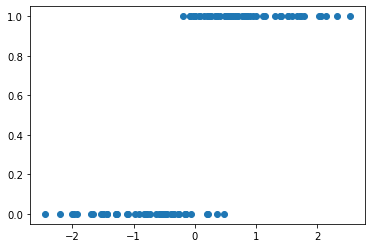

In [13]:
plt.scatter(X,y)

In [14]:
clf.coef_, clf.intercept_

(array([[3.1334253]]), array([0.13593467]))

In [15]:
x_transf = X * clf.coef_ + clf.intercept_

In [16]:
resp = sigmoid(x_transf)

In [17]:
resp.shape

(100, 1)

In [18]:
idx = X.ravel().argsort()

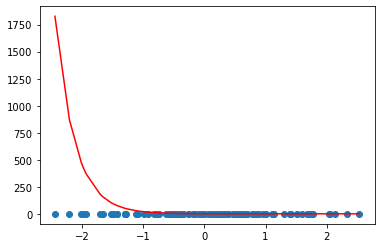

In [19]:
plt.scatter(X,y)
plt.plot(X.ravel()[idx], resp.ravel()[idx], color = "r")

In [20]:
from sklearn import linear_model

In [21]:
ols = linear_model.LinearRegression()
ols.fit(X,y)

LinearRegression()

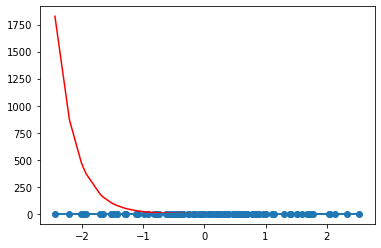

In [22]:
plt.scatter(X,y)
plt.plot(X.ravel()[idx], resp.ravel()[idx], color = "r")
plt.plot(X, ols.predict(X))

In [23]:
from sklearn import datasets

In [24]:
iris = datasets.load_iris()

In [25]:
X = iris.data
y = iris.target

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 0)

In [28]:
modelo = linear_model.LogisticRegression()
modelo.fit(X_treino,y_treino)

/home/tiago/anaconda3/envs/mldl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = modelo.predict(X_teste)

In [30]:
modelo.score(X_teste, y_teste)

0.9736842105263158

In [31]:
 y_teste == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [32]:
sum(y_teste == y_pred)/len(y_pred)

0.9736842105263158

In [33]:
confusion_matrix(y_teste,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
["Valor predito: %s" % x for x in iris.target_names]

['Valor predito: setosa',
 'Valor predito: versicolor',
 'Valor predito: virginica']

In [36]:
cm = confusion_matrix(y_teste,y_pred)

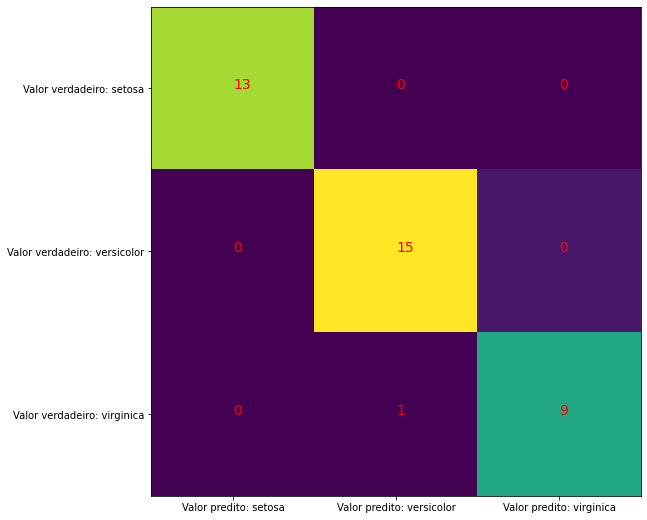

In [37]:
fig, ax = plt.subplots(figsize = (9,9))
ax.imshow(cm)
ax.xaxis.set(ticks = (0,1,2), ticklabels = ["Valor predito: %s" % x for x in iris.target_names])
ax.yaxis.set(ticks = (0,1,2), ticklabels = ["Valor verdadeiro: %s" % x for x in iris.target_names])
for i in range(3):
    for j in range(3):
        ax.text(i,j, cm[i,j], fontsize = 14, color = "red")

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_treino,y_treino)

LinearDiscriminantAnalysis()

In [40]:
X_treino.shape

(112, 4)

In [41]:
X_transf = lda.transform(X_teste)

In [42]:
X_transf.shape

(38, 2)

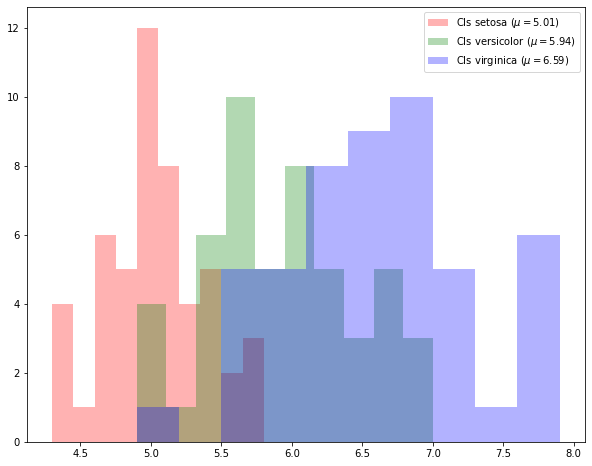

In [43]:
colors = ["red","green","blue"]
plt.figure(figsize = (10,8))
for label,color in zip(range(3),colors):
    media = np.mean(X[y == label,0])
    std   = np.std(X[y == label,0])
    lab_form = "Cls {} ($\mu={:.2f})$".format(iris.target_names[label], media)
    plt.hist(X[y == label,0], alpha = 0.3, label = lab_form, color = color)
plt.legend()

In [44]:
a = y_pred == y_teste
a = a.astype(int)
y_teste[a == 0], y_pred[a == 0]

(array([1]), array([2]))

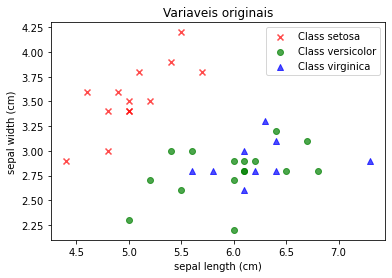

In [45]:
for label,marker,color in zip(range(3),("x","o","^"),("r","g","b")):
    plt.scatter(
        x = X_teste[y_teste == label,0], 
        y = X_teste[y_teste == label,1],
        marker = marker,
        color = color,
        alpha = .7,
        label = f"Class {iris.target_names[label]}"
        )
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Variaveis originais")
plt.legend()

In [46]:
X_transf.shape

(38, 2)

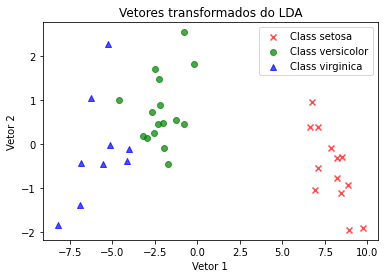

In [47]:
for label,marker,color in zip(range(3),("x","o","^"),("r","g","b")):
    plt.scatter(
        x = X_transf[y_teste == label,0], 
        y = X_transf[y_teste == label,1],
        marker = marker,
        color = color,
        alpha = .7,
        label = f"Class {iris.target_names[label]}"
        )
plt.xlabel("Vetor 1")
plt.ylabel("Vetor 2")
plt.title("Vetores transformados do LDA")
plt.legend()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [49]:
modelo = KNeighborsClassifier(n_neighbors = 3).fit(X_treino,y_treino)

In [50]:
y_pred = modelo.predict(X_teste)

In [51]:
modelo.predict(X_teste[0,:].reshape(1,4))

array([2])

In [52]:
k_range = range(1,10)
lista_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_treino,y_treino)
    y_pred = knn.predict(X_teste)
    acc = metrics.accuracy_score(y_teste, y_pred)
    lista_score.append(acc)

In [53]:
lista_score

[0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

In [54]:
idx = np.random.choice(list(range(X_treino.shape[0])),30, replace = False)

In [55]:
k_range = range(1,10)
lista_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_treino[idx,:],y_treino[idx])
    y_pred = knn.predict(X_teste)
    acc = metrics.accuracy_score(y_teste, y_pred)
    lista_score.append(acc)

In [56]:
lista_score

[0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473]

In [57]:
knn = KNeighborsClassifier()
logr = LogisticRegression()
lindr = LinearDiscriminantAnalysis()

In [58]:
knn.fit(X[:,:2], y)
logr.fit(X[:,:2], y)
lindr.fit(X[:,:2], y)

LinearDiscriminantAnalysis()

In [59]:
h = 0.2
x_min,x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5

In [60]:
y_min,y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

In [61]:
xx,yy = np.meshgrid(
    np.arange(x_min,x_max,h),
    np.arange(y_min,y_max,h),
    )

In [62]:
xx.ravel().shape

(391,)

In [63]:
y_simu = np.column_stack((xx.ravel(),yy.ravel()))

In [64]:
Z_knn = knn.predict(y_simu)

In [65]:
Z_logr = logr.predict(y_simu)

In [66]:
Z_lindr = lindr.predict(y_simu)

In [67]:
Z_knn = Z_knn.reshape(xx.shape)
Z_logr = Z_logr.reshape(xx.shape)
Z_lindr = Z_lindr.reshape(xx.shape)

In [68]:
plt.figure(figsize = (10,8))
ply.pcolormesh(xx,yy,Z_logr)


NameError: name 'ply' is not defined

<Figure size 720x576 with 0 Axes>